In [13]:
%matplotlib widget

In [1]:
import sys
import os
import torch

# Get the absolute path to the src directory
src_path = os.path.abspath(os.path.join(os.getcwd(), '..', 'src'))

# Add the src directory to sys.path
sys.path.append(src_path)
from raw_data_preproccesing import label_audio, extract_features, prepare_framewise_data, normalize_data, read_raw_data



In [2]:

path = "../data/big_data"
# read data from data_folders
# data = read_data_multiple_folders(data_folders)
data = read_raw_data(path)
audio_data = data['audio_data']
press_times = data['press_times']



reading text.wav and  text.txt are in ../data/big_data\1
reading text.wav and  text.txt are in ../data/big_data\10
reading text.wav and  text.txt are in ../data/big_data\11
reading text.wav and  text.txt are in ../data/big_data\12
reading text.wav and  text.txt are in ../data/big_data\13
reading text.wav and  text.txt are in ../data/big_data\14
reading text.wav and  text.txt are in ../data/big_data\2
reading text.wav and  text.txt are in ../data/big_data\3
reading text.wav and  text.txt are in ../data/big_data\4
reading text.wav and  text.txt are in ../data/big_data\5
reading text.wav and  text.txt are in ../data/big_data\6
reading text.wav and  text.txt are in ../data/big_data\7
reading text.wav and  text.txt are in ../data/big_data\8
reading text.wav and  text.txt are in ../data/big_data\9


In [3]:
# Extract features for each audio file
n_fft = 2048
n_mels = 64
hop_length = 512
features = []
times_list = []
for (audio, sr), timestamps in zip(audio_data, press_times):
        mel_features, times_ms, overlap = extract_features(audio, sr, n_fft=n_fft, n_mels=n_mels, hop_length=hop_length)
        features.append(mel_features)
        times_list.append(times_ms)

    # labling data
labels = []
for times_ms, timestamps in zip(times_list, press_times):
        labels.append(label_audio(times_ms, timestamps, overlap))

X, y = [], []
    
for mel_features, label in zip(features, labels):
        # Flatten along time axis
        X.append(mel_features.T)  # Transpose so each row is a time frame (n_mels,)
        y.append(label)

X_train = X
y_train = y

normalizer_path = "../staged_product/tensors/normalization_params.pt"

# read the file 
mean, std = torch.load(normalizer_path)

norm_X_train = []
for x in X_train:
    norm_X_train.append((x - mean) / std)


C:\Users\reza\AppData\Local\Temp\ipykernel_6208\3258467876.py:30: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  mean, std = torch.load(normalizer_path)


In [4]:
mean

array([-37.88849 , -32.062923, -33.823456, -37.55027 , -40.609154,
       -43.27915 , -43.870575, -44.460983, -46.55418 , -48.437138,
       -49.51694 , -49.827084, -50.033424, -49.45221 , -49.385757,
       -49.671875, -49.56197 , -49.153477, -48.590015, -49.46234 ,
       -51.634357, -53.950745, -55.93539 , -57.34476 , -57.532166,
       -57.457447, -57.667835, -57.409817, -57.819237, -58.805527,
       -59.28394 , -59.35805 , -60.37351 , -62.196274, -62.57456 ,
       -61.604362, -60.75589 , -59.72992 , -60.70381 , -62.80376 ,
       -63.353527, -64.62508 , -64.29839 , -64.40514 , -64.29874 ,
       -63.774876, -64.523026, -65.26077 , -65.54243 , -66.28406 ,
       -67.34719 , -68.270355, -68.97073 , -68.98519 , -69.01148 ,
       -68.9399  , -69.414375, -69.76768 , -70.97341 , -72.29544 ,
       -73.76621 , -74.59235 , -75.8288  , -77.70003 ], dtype=float32)

In [5]:
std

array([10.234482 ,  9.401442 ,  9.406171 ,  8.766634 ,  9.054104 ,
        9.45067  , 10.43796  , 10.055206 , 10.162792 , 10.566145 ,
       10.299067 , 10.3594265, 11.449653 , 12.216823 , 12.560214 ,
       12.478755 , 11.92648  , 11.772781 , 12.231959 , 12.668859 ,
       12.680496 , 12.252542 , 12.39401  , 12.163354 , 12.910746 ,
       13.445052 , 13.596762 , 13.542242 , 13.575048 , 13.179295 ,
       13.66992  , 14.360687 , 14.421231 , 13.965119 , 13.817915 ,
       14.465347 , 15.280595 , 15.928153 , 15.9623785, 15.217658 ,
       14.904427 , 14.091289 , 14.290845 , 14.145542 , 13.87354  ,
       13.818956 , 13.462118 , 13.122096 , 12.737101 , 12.133756 ,
       11.619133 , 11.30085  , 11.141522 , 10.919125 , 10.504838 ,
       10.592581 , 10.518748 , 10.649139 , 10.387135 ,  9.883357 ,
        8.588439 ,  7.7787123,  6.639822 ,  4.9962296], dtype=float32)

In [4]:
model_path = "../output/models/model_checkpoint.pth"
model_path = "../staged_product/output/models/model_checkpoint.pth"

checkpoint_model = torch.load(model_path)

model_state_dict = checkpoint_model['model_state_dict']
input_size = checkpoint_model['input_size']


C:\Users\reza\AppData\Local\Temp\ipykernel_6208\188877594.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint_model = torch.load(model_path)


In [5]:
import torch.nn as nn
class MyModel(nn.Module):
    def __init__(self, input_size):
        super(MyModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.output = nn.Linear(32, 1)
        
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.sigmoid(self.output(x))  # Output probability between 0 and 1
        return x

In [6]:
model = MyModel(input_size)

# Load the state dictionary
model.load_state_dict(model_state_dict)

# Set the model to evaluation mode
model.eval()

MyModel(
  (fc1): Linear(in_features=64, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=32, bias=True)
  (output): Linear(in_features=32, out_features=1, bias=True)
)

In [7]:
exp_number = 3 # 4
threshold = 0.7 # 0.9

input_data = torch.tensor(norm_X_train[exp_number], dtype=torch.float32)

predict_ligit = model(input_data)

predictions = (predict_ligit >= threshold).int().squeeze()

true_labels = torch.tensor(y_train[exp_number], dtype=torch.int)

In [8]:
len(predict_ligit)

11936

In [9]:
predictions

tensor([0, 0, 0,  ..., 1, 1, 1], dtype=torch.int32)

In [10]:
accuracy = (predictions == true_labels).float().mean()

# Correct Calculation of True Positives
true_positive = ((predictions == 1) & (true_labels == 1)).sum().item()

# Count the number of predicted positives
predicted_positive = (predictions == 1).sum().item()

# Avoid division by zero for precision calculation
precision = true_positive / (predicted_positive + 1e-8) if predicted_positive > 0 else 0.0

print(f"Accuracy: {accuracy.item():.4f}")
print(f"Precision: {precision:.4f}")

Accuracy: 0.9039
Precision: 0.7650


In [11]:
# plot the audio data
import matplotlib.pyplot as plt
import numpy as np



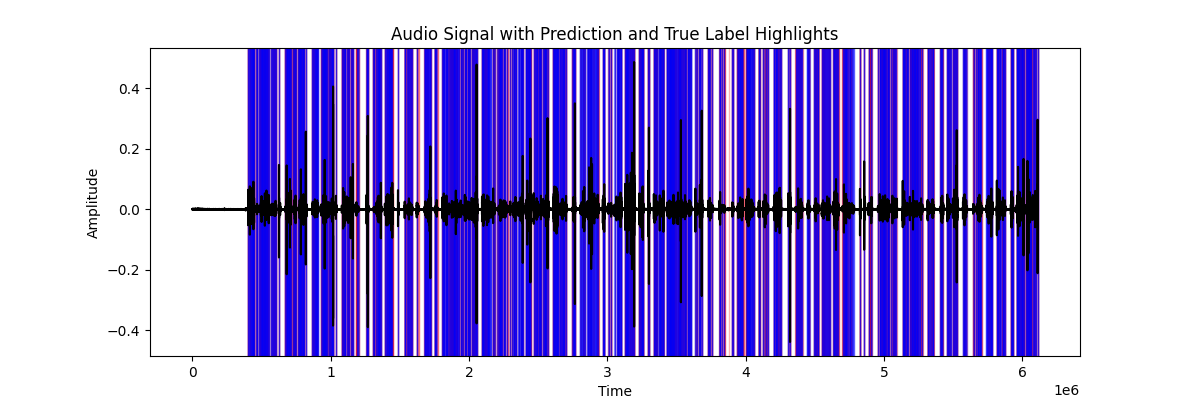

In [14]:
# Create time axes

plot_audio = audio_data[exp_number][0]
audio_time = np.linspace(0, len(plot_audio), len(plot_audio))
prediction_time = np.linspace(0, len(plot_audio), len(predictions))  # Scale to match audio timeline

# Plot audio
plt.figure(figsize=(12, 4))
plt.plot(audio_time, plot_audio, color='black', label="Audio Signal")

for i, pred in enumerate(predictions):
    if pred == 1:
        plt.axvspan(prediction_time[i], prediction_time[i + 1] if i + 1 < len(predictions) else prediction_time[i], 
                    color='red', alpha=0.3, label="Predicted Label" if i == 0 else "")

# Overlay horizontal bars for true labels (Blue)
for i, true in enumerate(true_labels):
    if true == 1:
        plt.axvspan(prediction_time[i], prediction_time[i + 1] if i + 1 < len(true_labels) else prediction_time[i], 
                    color='blue', alpha=0.3, label="True Label" if i == 0 else "")

plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Audio Signal with Prediction and True Label Highlights")

plt.show()

In [15]:
def keep_first_every_four(tensor, gap=4):
    result = torch.zeros_like(tensor)
    i = 0
    n = tensor.size(0)

    while i < n:
        if tensor[i] == 1:
            result[i] = 1
            i += 1
            count = 1
            while i < n and tensor[i] == 1:
                if count % gap == 0:
                    result[i] = 1
                i += 1
                count += 1
        else:
            i += 1
    return result

post_prediction = keep_first_every_four(predictions)
print(post_prediction)
# tensor([0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1])



tensor([0, 0, 0,  ..., 1, 0, 0], dtype=torch.int32)


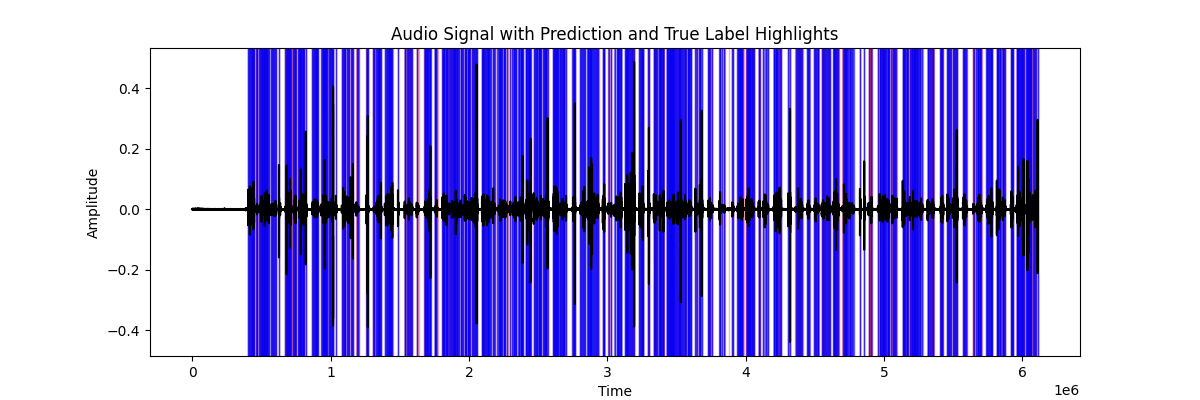

In [16]:

plot_audio = audio_data[exp_number][0]
audio_time = np.linspace(0, len(plot_audio), len(plot_audio))
prediction_time = np.linspace(0, len(plot_audio), len(post_prediction))  # Scale to match audio timeline

# Plot audio
plt.figure(figsize=(12, 4))
plt.plot(audio_time, plot_audio, color='black', label="Audio Signal")

for i, pred in enumerate(post_prediction):
    if pred == 1:
        plt.axvspan(prediction_time[i], prediction_time[i + 1] if i + 1 < len(post_prediction) else prediction_time[i], 
                    color='red', alpha=0.3, label="Predicted Label" if i == 0 else "")

# Overlay horizontal bars for true labels (Blue)
for i, true in enumerate(true_labels):
    if true == 1:
        plt.axvspan(prediction_time[i], prediction_time[i + 1] if i + 1 < len(true_labels) else prediction_time[i], 
                    color='blue', alpha=0.3, label="True Label" if i == 0 else "")

plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Audio Signal with Prediction and True Label Highlights")

plt.show()

In [17]:
mask = keep_first_every_four(post_prediction)

# Use the mask to filter tensor2
filtered_values = times_list[3][mask == 1]

In [18]:
len(filtered_values)

766

In [19]:
len(press_times[3]['time_step'].values)

1080